In [5]:
import pandas as pd
sales = pd.read_csv("Data/sales.csv",index_col='State')
sales

,Total Expenses,Product,Sales,Market Size,Profit,Market,Marketing,Product Type,Inventory,Type
State,,,,,,,,,,
California,63.0,Amaretto,109.0,Major Market,-131.0,West,40,Coffee,2947.0,Regular
California,55.0,Green Tea,201.0,Major Market,88.0,West,24,Tea,659.0,Regular
California,143.0,Caffe Mocha,289.0,Major Market,25.0,West,109,Espresso,788.0,Regular
California,113.0,Decaf Espresso,576.0,Major Market,216.0,West,81,Espresso,1744.0,Decaf
California,37.0,Chamomile,247.0,Major Market,148.0,West,26,Herbal Tea,809.0,Decaf
...,...,...,...,...,...,...,...,...,...,...
Wisconsin,34.0,Darjeeling,90.0,Small Market,20.0,Central,11,Tea,458.0,Regular
Wisconsin,36.0,Darjeeling,113.0,Small Market,31.0,Central,14,Tea,454.0,Regular
Wisconsin,86.0,Earl Grey,150.0,Small Market,1.0,Central,57,Tea,506.0,Regular


In [6]:
sales.Product.describe()

count            4241
unique             13
top       Caffe Mocha
freq              480
Name: Product, dtype: object

In [7]:
sales.Marketing.describe()

count    4241.000000
mean       31.124499
std        26.983618
min         0.000000
25%        13.000000
50%        22.000000
75%        39.000000
max       156.000000
Name: Marketing, dtype: float64

In [8]:
sales['Total Expenses'].mean()

53.98914582350165

In [9]:
sales.Product.unique()

array(['Amaretto', 'Green Tea', 'Caffe Mocha', 'Decaf Espresso',
       'Chamomile', 'Lemon', 'Mint', 'Darjeeling', 'Earl Grey',
       'Columbian', 'Caffe Latte', 'Decaf Irish Cream',
       'Regular Espresso'], dtype=object)

# unique values

In [10]:
sales.Product.value_counts()

Caffe Mocha          480
Lemon                479
Columbian            478
Decaf Espresso       407
Chamomile            384
Darjeeling           384
Decaf Irish Cream    384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Mint                 192
Amaretto             189
Regular Espresso      72
Name: Product, dtype: int64

# maps

In [11]:
sales.Sales.map(lambda x:x + 34)

State
California    143.0
California    235.0
California    323.0
California    610.0
California    281.0
              ...  
Wisconsin     124.0
Wisconsin     147.0
Wisconsin     184.0
Wisconsin     165.0
Wisconsin     199.0
Name: Sales, Length: 4241, dtype: float64

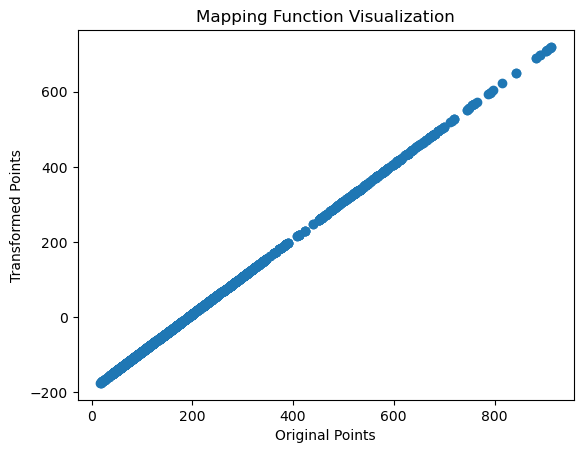

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume `reviews` is a DataFrame with a `points` column
review_points_mean = sales.Sales.mean()

# Define the mapping function using lambda
mapping_function = lambda p: p - review_points_mean

# Apply the mapping function to sales points column and save the result in a new column
sales['transformed_points'] = sales.Sales.map(mapping_function)

# Plot the original points against the transformed points
plt.scatter(sales.Sales, sales.transformed_points)
plt.xlabel('Original Points')
plt.ylabel('Transformed Points')
plt.title('Mapping Function Visualization')
plt.show()






# apply method

In [13]:
def change_rows(row):
    row.Marketing = row.Marketing + 33
    return row

sales.apply(change_rows,axis='columns')

#If we had called reviews.apply() with axis='index', then instead of passing a function to transform each row,
#we would need to give a function to transform each column.

,Total Expenses,Product,Sales,Market Size,Profit,Market,Marketing,Product Type,Inventory,Type,transformed_points
State,,,,,,,,,,,
California,63.0,Amaretto,109.0,Major Market,-131.0,West,73,Coffee,2947.0,Regular,-83.567351
California,55.0,Green Tea,201.0,Major Market,88.0,West,57,Tea,659.0,Regular,8.432649
California,143.0,Caffe Mocha,289.0,Major Market,25.0,West,142,Espresso,788.0,Regular,96.432649
California,113.0,Decaf Espresso,576.0,Major Market,216.0,West,114,Espresso,1744.0,Decaf,383.432649
California,37.0,Chamomile,247.0,Major Market,148.0,West,59,Herbal Tea,809.0,Decaf,54.432649
...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,34.0,Darjeeling,90.0,Small Market,20.0,Central,44,Tea,458.0,Regular,-102.567351
Wisconsin,36.0,Darjeeling,113.0,Small Market,31.0,Central,47,Tea,454.0,Regular,-79.567351
Wisconsin,86.0,Earl Grey,150.0,Small Market,1.0,Central,90,Tea,506.0,Regular,-42.567351


In [14]:
sales.Market + ' this ' +sales.Type
#these operations are faster then apply() or map() but are less flexible

State
California       West this Regular
California       West this Regular
California       West this Regular
California         West this Decaf
California         West this Decaf
                      ...         
Wisconsin     Central this Regular
Wisconsin     Central this Regular
Wisconsin     Central this Regular
Wisconsin     Central this Regular
Wisconsin     Central this Regular
Length: 4241, dtype: object

# I'm an economical buyer. Which wine is the "best bargain"? Create a variable bargain with the title of the wine with the highest points-to-price ratio in the dataset.

In [21]:
bargain_idx = (sales.Sales / sales.Profit).idxmax()
bargain_idx

'Colorado'

In [24]:
bargain_wine = sales.loc[bargain_idx]
bargain_wine

,Total Expenses,Product,Sales,Market Size,Profit,Market,Marketing,Product Type,Inventory,Type,transformed_points
State,,,,,,,,,,,
Colorado,39.0,Amaretto,243.0,Major Market,105.0,Central,27,Coffee,766.0,Regular,50.432649
Colorado,36.0,Amaretto,227.0,Major Market,134.0,Central,24,Coffee,756.0,Regular,34.432649
Colorado,45.0,Amaretto,322.0,Major Market,199.0,Central,34,Coffee,959.0,Regular,129.432649
Colorado,39.0,Columbian,190.0,Major Market,68.0,Central,27,Coffee,584.0,Regular,-2.567351
Colorado,39.0,Columbian,202.0,Major Market,101.0,Central,27,Coffee,613.0,Regular,9.432649
...,...,...,...,...,...,...,...,...,...,...,...
Colorado,34.0,Earl Grey,91.0,Major Market,16.0,Central,12,Tea,1046.0,Regular,-101.567351
Colorado,40.0,Earl Grey,145.0,Major Market,50.0,Central,19,Tea,958.0,Regular,-47.567351
Colorado,41.0,Earl Grey,144.0,Major Market,47.0,Central,19,Tea,952.0,Regular,-48.567351


# There are only so many words you can use when describing a bottle of wine. Is a wine more likely to be "tropical" or "fruity"? Create a Series descriptor_counts counting how many times each of these two words appears in the description column in the dataset. (For simplicity, let's ignore the capitalized versions of these words.)

In [26]:
n_trop = sales.Product.map(lambda desc: "Earl" in desc).sum()
n_fruity = sales.Product.map(lambda desc: "Amaretto" in desc).sum()
descriptor_counts = pd.Series([n_trop, n_fruity], index=['Earl', 'Amaretto'])
descriptor_counts

Earl        288
Amaretto    189
dtype: int64

# We'd like to host these wine reviews on our website, but a rating system ranging from 80 to 100 points is too hard to understand - we'd like to translate them into simple star ratings. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.

# Also, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.

# Create a series star_ratings with the number of stars corresponding to each review in the dataset.

In [30]:
def stars(row):
    #if row.State == 'Canada':
        #return 3
    if row.Sales >= 95:
        return 3
    elif row.Sales >= 85:
        return 2
    else:
        return 1

star_ratings = sales.apply(stars, axis='columns')
star_ratings

State
California    3
California    3
California    3
California    3
California    3
             ..
Wisconsin     2
Wisconsin     3
Wisconsin     3
Wisconsin     3
Wisconsin     3
Length: 4241, dtype: int64